In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def animate(matrices, name):
    fig, ax = plt.subplots()
    ax.set_title(name)
    
    Writer = matplotlib.animation.writers['ffmpeg']
    Writer = Writer(fps=500, metadata=dict(artist="Me"), bitrate=-1)
    
    image = ax.imshow(matrices[0].reshape(n, n))
    fig.colorbar(image)
    
    # Функция, которая будет обновлять график на каждом кадре анимации
    def update(frame):
        image.set_array(matrices[frame].reshape(n, n))
        return image,
    
    # Создаем анимацию
    anim = FuncAnimation(fig, update, frames=len(matrices))
    
    # Отображаем анимацию
    anim.save(f"{name}.mp4", writer=Writer)
    

In [3]:
def source(x, y):
    return 0

In [4]:
def initial(x, y):
    if (x - 0.5) ** 2 + (y - 0.5) ** 2 <= (1 / 4) ** 2:
        return 1
    else:
        return 0

In [5]:
def read_solution():
    with open("solution.mtx", "r") as f:
        numerical_solution = np.array(list(map(float, f.readlines()[1:])))
    return numerical_solution

Явная схема (без решения системы)

In [6]:
def matvec(u, n, dx, dy, h):
    N = n * n
    result = u * 2 * (dx + dy)
    p = np.full(N, -dy)
    p[n-1::n] = 0
    result[:-1] += np.multiply(p[:-1], u[1:])
    result[1:] += np.multiply(p[:-1], u[:-1])
    p = np.full(N - n, -dx)
    result[:-n] += np.multiply(p, u[n:])
    result[n:] += np.multiply(p, u[:-n])
    return result / h ** 2

In [7]:
n = 100
N = n * n
dx = 1
dy = 10
h = 1 / (n + 1)
delta_t = 0.01 * (h ** 2)

In [8]:
history = []
u = np.zeros(N)

idx = 0
for i in range(1, n + 1): #строка
    for j in range(1, n + 1): #столбец
        u[idx] = initial(j * h, i * h)
        idx += 1
        
history.append(u)

In [9]:
for i in range(100):
    history.append(history[-1] - delta_t * matvec(history[-1], n, dx, dy, h))

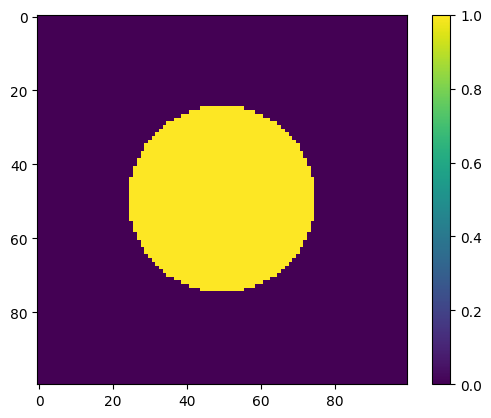

In [10]:
plt.imshow(history[0].reshape(n, n))
plt.colorbar()

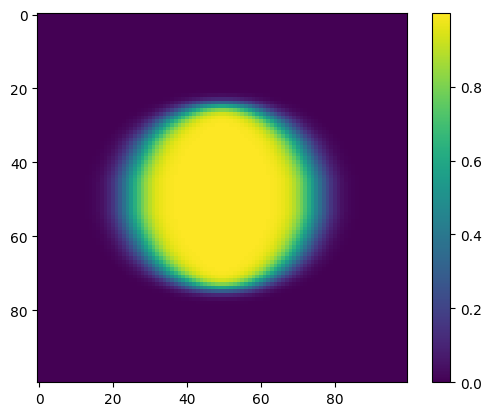

In [11]:
plt.imshow(history[-1].reshape(n, n))
plt.colorbar()

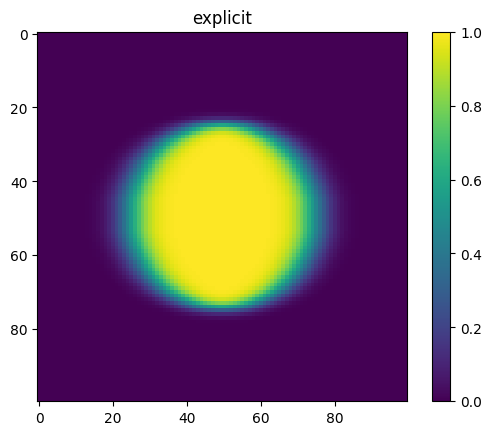

In [12]:
animate(history, 'explicit')

Неявная схема

In [26]:
n = 100
N = n * n
dx = 1
dy = 10
h = 1 / (n + 1)
delta_t = 0.001

In [27]:
def write_matrix():
    with open(f"matrix.mtx", "w") as f:
        f.write(f"%MatrixMarket matrix coordinate real general\n")
        f.write(f"{N} {N} {N + 2 * (N - 1) + 2 * (N - n) - 2 * (n - 1)}\n")

        for i in range(1, N + 1):
            f.write(f"{i} {i} {(2 * dx + 2 * dy) / (h ** 2) + 1 / delta_t}\n")

        for i in range(2, N + 1):
            if (i % n != 1):
                f.write(f"{i} {i - 1} {-dy / (h ** 2)}\n")

        for i in range(2, N + 1):
            if (i % n != 1):
                f.write(f"{i - 1} {i} {-dy / (h ** 2)}\n")

        for i in range(n + 1, N + 1):
            f.write(f"{i} {i - n} {-dx / (h ** 2)}\n")

        for i in range(n + 1, N + 1):
            f.write(f"{i - n} {i} {-dx / (h ** 2)}\n")

In [28]:
history = []
write_matrix()
u = np.zeros(N)

idx = 0
for i in range(1, n + 1):
    for j in range(1, n + 1):
        u[idx] = initial(j * h, i * h)
        idx += 1
        
history.append(u)

In [29]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [30]:
from tqdm import tqdm

In [31]:
for i in tqdm(range(100)):
    with open(f"rhs.mtx", "w") as f:
        f.write(f"%MatrixMarket matrix array real general\n")
        f.write(f"{N} {1}\n")
        for i in history[-1]:
            f.write(f"{i / delta_t}\n")
    os.system(f"./build/main")
    u = read_solution()
    history.append(u)

  1%|▋                                                                        | 1/100 [00:00<00:20,  4.73it/s]

Размер системы: 10000
ILU(2): 75 ms
BiCGStab: 39 ms
Number of iterations: 5
Residual: 6.08074e-10


  2%|█▍                                                                       | 2/100 [00:00<00:20,  4.77it/s]

Размер системы: 10000
ILU(2): 74 ms
BiCGStab: 38 ms
Number of iterations: 5
Residual: 2.50953e-10


  3%|██▏                                                                      | 3/100 [00:00<00:20,  4.73it/s]

Размер системы: 10000
ILU(2): 76 ms
BiCGStab: 40 ms
Number of iterations: 5
Residual: 1.33578e-10


  4%|██▉                                                                      | 4/100 [00:00<00:20,  4.65it/s]

Размер системы: 10000
ILU(2): 79 ms
BiCGStab: 37 ms
Number of iterations: 5
Residual: 2.43914e-10


  5%|███▋                                                                     | 5/100 [00:01<00:20,  4.74it/s]

Размер системы: 10000
ILU(2): 76 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 1.71669e-10
Размер системы: 10000


  6%|████▍                                                                    | 6/100 [00:01<00:20,  4.68it/s]

ILU(2): 80 ms
BiCGStab: 46 ms
Number of iterations: 5
Residual: 4.43145e-11
Размер системы: 10000


  7%|█████                                                                    | 7/100 [00:01<00:20,  4.65it/s]

ILU(2): 78 ms
BiCGStab: 42 ms
Number of iterations: 5
Residual: 3.75863e-11
Размер системы: 10000


  8%|█████▊                                                                   | 8/100 [00:01<00:20,  4.54it/s]

ILU(2): 81 ms
BiCGStab: 45 ms
Number of iterations: 5
Residual: 5.3759e-11
Размер системы: 10000


  9%|██████▌                                                                  | 9/100 [00:01<00:20,  4.54it/s]

ILU(2): 80 ms
BiCGStab: 43 ms
Number of iterations: 5
Residual: 8.80689e-11
Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 1.33596e-10


 11%|███████▉                                                                | 11/100 [00:02<00:18,  4.78it/s]

Размер системы: 10000
ILU(2): 71 ms
BiCGStab: 38 ms
Number of iterations: 5
Residual: 2.74127e-10


 12%|████████▋                                                               | 12/100 [00:02<00:18,  4.77it/s]

Размер системы: 10000
ILU(2): 77 ms
BiCGStab: 37 ms
Number of iterations: 5
Residual: 1.61492e-10


 13%|█████████▎                                                              | 13/100 [00:02<00:17,  4.85it/s]

Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 1.93813e-10


 14%|██████████                                                              | 14/100 [00:02<00:17,  4.81it/s]

Размер системы: 10000
ILU(2): 74 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 2.13218e-10


 15%|██████████▊                                                             | 15/100 [00:03<00:17,  4.77it/s]

Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 46 ms
Number of iterations: 5
Residual: 2.00367e-10


 16%|███████████▌                                                            | 16/100 [00:03<00:17,  4.70it/s]

Размер системы: 10000
ILU(2): 78 ms
BiCGStab: 39 ms
Number of iterations: 5
Residual: 1.81141e-10


 17%|████████████▏                                                           | 17/100 [00:03<00:17,  4.82it/s]

Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 37 ms
Number of iterations: 5
Residual: 1.65336e-10


 18%|████████████▉                                                           | 18/100 [00:03<00:18,  4.48it/s]

Размер системы: 10000
ILU(2): 92 ms
BiCGStab: 44 ms
Number of iterations: 5
Residual: 1.56272e-10


 19%|█████████████▋                                                          | 19/100 [00:04<00:19,  4.16it/s]

Размер системы: 10000
ILU(2): 100 ms
BiCGStab: 53 ms
Number of iterations: 5
Residual: 1.5611e-10


 20%|██████████████▍                                                         | 20/100 [00:04<00:19,  4.16it/s]

Размер системы: 10000
ILU(2): 91 ms
BiCGStab: 37 ms
Number of iterations: 5
Residual: 1.69971e-10


 21%|███████████████                                                         | 21/100 [00:04<00:17,  4.45it/s]

Размер системы: 10000
ILU(2): 70 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 2.17048e-10
Размер системы: 10000


 22%|███████████████▊                                                        | 22/100 [00:04<00:17,  4.58it/s]

ILU(2): 74 ms
BiCGStab: 39 ms
Number of iterations: 5
Residual: 4.3409e-10
Размер системы: 10000


 24%|█████████████████▎                                                      | 24/100 [00:05<00:15,  4.78it/s]

ILU(2): 81 ms
BiCGStab: 39 ms
Number of iterations: 5
Residual: 7.51089e-10
Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 37 ms
Number of iterations: 5
Residual: 1.51981e-10


 25%|██████████████████                                                      | 25/100 [00:05<00:15,  4.82it/s]

Размер системы: 10000
ILU(2): 72 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 7.30933e-11
Размер системы: 10000


 27%|███████████████████▍                                                    | 27/100 [00:05<00:14,  5.06it/s]

ILU(2): 71 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 4.32092e-11
Размер системы: 10000
ILU(2): 71 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 2.65822e-11


 28%|████████████████████▏                                                   | 28/100 [00:05<00:14,  5.07it/s]

Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 1.33956e-11
Размер системы: 10000


 29%|████████████████████▉                                                   | 29/100 [00:06<00:13,  5.07it/s]

ILU(2): 74 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 2.56414e-12
Размер системы: 10000


 30%|█████████████████████▌                                                  | 30/100 [00:06<00:15,  4.44it/s]

ILU(2): 120 ms
BiCGStab: 55 ms
Number of iterations: 5
Residual: 6.71088e-12
Размер системы: 10000


 31%|██████████████████████▎                                                 | 31/100 [00:06<00:16,  4.23it/s]

ILU(2): 100 ms
BiCGStab: 40 ms
Number of iterations: 5
Residual: 9.28808e-12
Размер системы: 10000


 32%|███████████████████████                                                 | 32/100 [00:06<00:15,  4.36it/s]

ILU(2): 81 ms
BiCGStab: 40 ms
Number of iterations: 5
Residual: 9.75705e-12
Размер системы: 10000


 33%|███████████████████████▊                                                | 33/100 [00:07<00:15,  4.25it/s]

ILU(2): 85 ms
BiCGStab: 46 ms
Number of iterations: 5
Residual: 9.4317e-12
Размер системы: 10000


 34%|████████████████████████▍                                               | 34/100 [00:07<00:15,  4.21it/s]

ILU(2): 78 ms
BiCGStab: 38 ms
Number of iterations: 5
Residual: 8.83181e-12
Размер системы: 10000


 35%|█████████████████████████▏                                              | 35/100 [00:07<00:14,  4.39it/s]

ILU(2): 75 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 8.15339e-12
Размер системы: 10000


 36%|█████████████████████████▉                                              | 36/100 [00:07<00:14,  4.50it/s]

ILU(2): 73 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 7.47335e-12
Размер системы: 10000


 37%|██████████████████████████▋                                             | 37/100 [00:08<00:14,  4.41it/s]

ILU(2): 97 ms
BiCGStab: 49 ms
Number of iterations: 5
Residual: 6.82267e-12
Размер системы: 10000


 38%|███████████████████████████▎                                            | 38/100 [00:08<00:15,  4.00it/s]

ILU(2): 114 ms
BiCGStab: 45 ms
Number of iterations: 5
Residual: 6.21344e-12
Размер системы: 10000


 39%|████████████████████████████                                            | 39/100 [00:08<00:14,  4.20it/s]

ILU(2): 73 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 5.64946e-12
Размер системы: 10000


 40%|████████████████████████████▊                                           | 40/100 [00:08<00:13,  4.40it/s]

ILU(2): 78 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 5.13078e-12
Размер системы: 10000


 41%|█████████████████████████████▌                                          | 41/100 [00:09<00:13,  4.34it/s]

ILU(2): 79 ms
BiCGStab: 44 ms
Number of iterations: 5
Residual: 4.65568e-12
Размер системы: 10000


 42%|██████████████████████████████▏                                         | 42/100 [00:09<00:12,  4.47it/s]

ILU(2): 77 ms
BiCGStab: 40 ms
Number of iterations: 5
Residual: 4.22169e-12
Размер системы: 10000


 44%|███████████████████████████████▋                                        | 44/100 [00:09<00:12,  4.60it/s]

ILU(2): 82 ms
BiCGStab: 36 ms
Number of iterations: 5
Residual: 3.82601e-12
Размер системы: 10000
ILU(2): 75 ms
BiCGStab: 38 ms
Number of iterations: 5
Residual: 3.46577e-12


 45%|████████████████████████████████▍                                       | 45/100 [00:09<00:11,  4.75it/s]

Размер системы: 10000
ILU(2): 74 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 3.13817e-12
Размер системы: 10000


 46%|█████████████████████████████████                                       | 46/100 [00:10<00:10,  4.91it/s]

ILU(2): 72 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 2.84051e-12
Размер системы: 10000
ILU(2): 75 ms
BiCGStab: 42 ms
Number of iterations: 5
Residual: 2.57026e-12


 48%|██████████████████████████████████▌                                     | 48/100 [00:10<00:10,  5.02it/s]

Размер системы: 10000
ILU(2): 72 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 2.32506e-12
Размер системы: 10000


 50%|████████████████████████████████████                                    | 50/100 [00:10<00:09,  5.25it/s]

ILU(2): 70 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 2.1027e-12
Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 34 ms
Number of iterations: 5
Residual: 1.90116e-12


 51%|████████████████████████████████████▋                                   | 51/100 [00:10<00:09,  5.31it/s]

Размер системы: 10000
ILU(2): 69 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 1.71856e-12
Размер системы: 10000


 53%|██████████████████████████████████████▏                                 | 53/100 [00:11<00:08,  5.41it/s]

ILU(2): 69 ms
BiCGStab: 34 ms
Number of iterations: 5
Residual: 1.5532e-12
Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 1.4035e-12


 54%|██████████████████████████████████████▉                                 | 54/100 [00:11<00:08,  5.20it/s]

Размер системы: 10000
ILU(2): 78 ms
BiCGStab: 41 ms
Number of iterations: 5
Residual: 1.26802e-12


 55%|███████████████████████████████████████▌                                | 55/100 [00:11<00:08,  5.04it/s]

Размер системы: 10000
ILU(2): 77 ms
BiCGStab: 39 ms
Number of iterations: 5
Residual: 1.14545e-12
Размер системы: 10000


 57%|█████████████████████████████████████████                               | 57/100 [00:12<00:08,  5.25it/s]

ILU(2): 68 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 1.03458e-12
Размер системы: 10000
ILU(2): 72 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 9.34326e-13


 58%|█████████████████████████████████████████▊                              | 58/100 [00:12<00:07,  5.32it/s]

Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 35 ms
Number of iterations: 5
Residual: 8.43691e-13
Размер системы: 10000


 60%|███████████████████████████████████████████▏                            | 60/100 [00:12<00:07,  5.50it/s]

ILU(2): 69 ms
BiCGStab: 34 ms
Number of iterations: 5
Residual: 7.61767e-13
Размер системы: 10000
ILU(2): 70 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 9.42295e-10


 61%|███████████████████████████████████████████▉                            | 61/100 [00:12<00:07,  5.52it/s]

Размер системы: 10000
ILU(2): 69 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 8.5053e-10
Размер системы: 10000


 63%|█████████████████████████████████████████████▎                          | 63/100 [00:13<00:06,  5.56it/s]

ILU(2): 72 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 7.6769e-10
Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 6.92905e-10


 64%|██████████████████████████████████████████████                          | 64/100 [00:13<00:06,  5.58it/s]

Размер системы: 10000
ILU(2): 69 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 6.25394e-10
Размер системы: 10000


 66%|███████████████████████████████████████████████▌                        | 66/100 [00:13<00:05,  5.69it/s]

ILU(2): 70 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 5.64449e-10
Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 5.09433e-10


 67%|████████████████████████████████████████████████▏                       | 67/100 [00:13<00:05,  5.64it/s]

Размер системы: 10000
ILU(2): 70 ms
BiCGStab: 30 ms
Number of iterations: 4
Residual: 4.59769e-10


 68%|████████████████████████████████████████████████▉                       | 68/100 [00:14<00:06,  5.14it/s]

Размер системы: 10000
ILU(2): 75 ms
BiCGStab: 29 ms
Number of iterations: 4
Residual: 4.14938e-10
Размер системы: 10000


 70%|██████████████████████████████████████████████████▍                     | 70/100 [00:14<00:05,  5.38it/s]

ILU(2): 70 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 3.7447e-10
Размер системы: 10000
ILU(2): 67 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 3.37942e-10


 71%|███████████████████████████████████████████████████                     | 71/100 [00:14<00:05,  5.37it/s]

Размер системы: 10000
ILU(2): 76 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 3.04971e-10
Размер системы: 10000


 73%|████████████████████████████████████████████████████▌                   | 73/100 [00:15<00:05,  5.37it/s]

ILU(2): 88 ms
BiCGStab: 29 ms
Number of iterations: 4
Residual: 2.75211e-10
Размер системы: 10000
ILU(2): 72 ms
BiCGStab: 29 ms
Number of iterations: 4
Residual: 2.4835e-10


 74%|█████████████████████████████████████████████████████▎                  | 74/100 [00:15<00:04,  5.30it/s]

Размер системы: 10000
ILU(2): 74 ms
BiCGStab: 31 ms
Number of iterations: 4
Residual: 2.24106e-10
Размер системы: 10000


 76%|██████████████████████████████████████████████████████▋                 | 76/100 [00:15<00:04,  5.26it/s]

ILU(2): 85 ms
BiCGStab: 32 ms
Number of iterations: 4
Residual: 2.02225e-10
Размер системы: 10000
ILU(2): 70 ms
BiCGStab: 29 ms
Number of iterations: 4
Residual: 1.82478e-10


 77%|███████████████████████████████████████████████████████▍                | 77/100 [00:15<00:04,  5.34it/s]

Размер системы: 10000
ILU(2): 69 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 1.64656e-10
Размер системы: 10000


 79%|████████████████████████████████████████████████████████▉               | 79/100 [00:16<00:03,  5.53it/s]

ILU(2): 70 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 1.48572e-10
Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 1.34057e-10


 80%|█████████████████████████████████████████████████████████▌              | 80/100 [00:16<00:03,  5.59it/s]

Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 1.20959e-10
Размер системы: 10000


 82%|███████████████████████████████████████████████████████████             | 82/100 [00:16<00:03,  5.62it/s]

ILU(2): 70 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 1.09138e-10
Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 9.84719e-11


 83%|███████████████████████████████████████████████████████████▊            | 83/100 [00:16<00:03,  5.59it/s]

Размер системы: 10000
ILU(2): 70 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 8.88467e-11
Размер системы: 10000


 84%|████████████████████████████████████████████████████████████▍           | 84/100 [00:17<00:03,  5.20it/s]

ILU(2): 94 ms
BiCGStab: 37 ms
Number of iterations: 4
Residual: 8.01614e-11
Размер системы: 10000


 85%|█████████████████████████████████████████████████████████████▏          | 85/100 [00:17<00:03,  4.94it/s]

ILU(2): 82 ms
BiCGStab: 37 ms
Number of iterations: 4
Residual: 7.23243e-11
Размер системы: 10000


 87%|██████████████████████████████████████████████████████████████▋         | 87/100 [00:17<00:02,  4.93it/s]

ILU(2): 79 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 6.52527e-11
Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 5.88719e-11


 88%|███████████████████████████████████████████████████████████████▎        | 88/100 [00:17<00:02,  5.12it/s]

Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 5.31146e-11
Размер системы: 10000


 89%|████████████████████████████████████████████████████████████████        | 89/100 [00:18<00:02,  5.21it/s]

ILU(2): 73 ms
BiCGStab: 29 ms
Number of iterations: 4
Residual: 4.79198e-11
Размер системы: 10000
ILU(2): 79 ms
BiCGStab: 35 ms
Number of iterations: 4
Residual: 4.32328e-11


 91%|█████████████████████████████████████████████████████████████████▌      | 91/100 [00:18<00:01,  5.06it/s]

Размер системы: 10000
ILU(2): 75 ms
BiCGStab: 32 ms
Number of iterations: 4
Residual: 3.90039e-11
Размер системы: 10000


 93%|██████████████████████████████████████████████████████████████████▉     | 93/100 [00:18<00:01,  5.24it/s]

ILU(2): 73 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 3.51883e-11
Размер системы: 10000
ILU(2): 68 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 3.17458e-11


 94%|███████████████████████████████████████████████████████████████████▋    | 94/100 [00:19<00:01,  5.25it/s]

Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 28 ms
Number of iterations: 4
Residual: 2.86399e-11
Размер системы: 10000


 96%|█████████████████████████████████████████████████████████████████████   | 96/100 [00:19<00:00,  5.45it/s]

ILU(2): 71 ms
BiCGStab: 29 ms
Number of iterations: 4
Residual: 2.58377e-11
Размер системы: 10000
ILU(2): 69 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 2.33095e-11


 97%|█████████████████████████████████████████████████████████████████████▊  | 97/100 [00:19<00:00,  5.53it/s]

Размер системы: 10000
ILU(2): 69 ms
BiCGStab: 27 ms
Number of iterations: 4
Residual: 2.10286e-11
Размер системы: 10000


 98%|██████████████████████████████████████████████████████████████████████▌ | 98/100 [00:19<00:00,  5.27it/s]

ILU(2): 80 ms
BiCGStab: 39 ms
Number of iterations: 4
Residual: 1.89708e-11
Размер системы: 10000


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.95it/s]

ILU(2): 83 ms
BiCGStab: 35 ms
Number of iterations: 4
Residual: 1.71143e-11
Размер системы: 10000
ILU(2): 73 ms
BiCGStab: 32 ms
Number of iterations: 4
Residual: 1.54394e-11


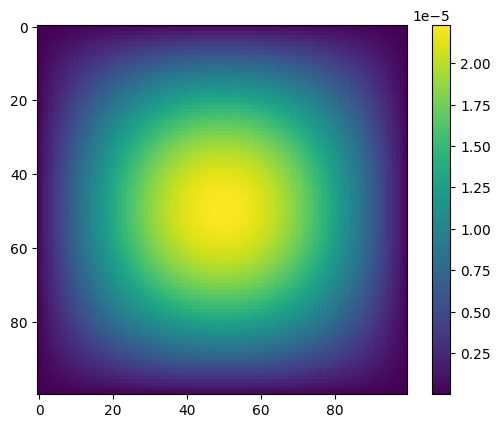

In [32]:
plt.imshow(history[-1].reshape(n, n))
len(history)
plt.colorbar()

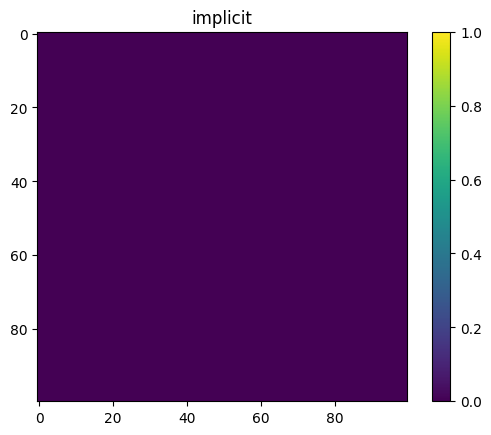

In [33]:
animate(history, 'implicit')